In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

plt.style.use("seaborn")

/var/folders/g5/v3rvf25j7kb6bppjcjpx1jl80000gn/T/ipykernel_40649/925851817.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


### Loading the data and micro exploration 
* find out the column Dtypes
* estimate the missing values in each column 
* locate and analyze categorical data/columns

In [5]:
data_frame = pd.read_csv("titles.csv") 
data_frame.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [37]:
data_frame.isna().sum() # isna is for finding missing values, we use sum() on top of it so we get each column's missing value sum

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [12]:
isna_total = data_frame.isna().sum().to_dict()
print("Total # of Anomalies (missing values) found : ", sum([val for val in isna_total.values()]))

Total # of Anomalies (missing values) found :  8306


In [15]:
data_frame.sort_values(['release_year'], ascending=False)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5358,ts320872,Queer Eye Germany,SHOW,"Five experts in lifestyle, fashion, beauty, he...",2022,TV-14,50,['reality'],['DE'],1.0,tt16369694,7.5,788.0,2.490,1.0
5200,tm1120902,The Privilege,MOVIE,A wealthy teen and his friends attending an el...,2022,NaN,107,"['scifi', 'thriller', 'drama', 'horror']",['DE'],NaN,tt14637290,4.6,3900.0,415.203,5.1
4992,tm1185506,The Taming of the Shrewd,MOVIE,When a heartbroken scientist moves back home t...,2022,NaN,112,"['romance', 'comedy']",['PL'],NaN,tt18970380,4.6,630.0,29.626,5.0
5221,ts343426,Senzo: Murder of a Soccer Star,SHOW,Soccer player Senzo Meyiwa was a national hero...,2022,NaN,40,"['crime', 'documentation']","['ZA', 'US']",1.0,tt18954258,NaN,NaN,2.632,NaN
5218,ts315144,The Creature Cases,SHOW,"Follows Sam Snow and Kit Casey, two brilliant ...",2022,TV-Y,0,"['animation', 'family', 'action', 'comedy']",['US'],1.0,tt15527326,NaN,NaN,5.349,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,tm204541,Dark Waters,MOVIE,"Ragab, a poor sailor, returns home to Alexandr...",1956,NaN,120,"['drama', 'action', 'romance', 'thriller']",['EG'],NaN,tt0049761,6.7,590.0,1.044,5.9
15,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"['romance', 'comedy', 'music']",['US'],NaN,tt0047673,7.5,42373.0,9.710,7.2
28,tm19608,The Blazing Sun,MOVIE,A rich landlord floods and destroys a village ...,1954,NaN,100,"['romance', 'crime', 'drama']",['EG'],NaN,tt0044429,7.4,1219.0,1.866,7.0
24,tm102287,Raya and Sakina,MOVIE,Dramatic rendition of a real life crime wave t...,1953,NaN,105,"['drama', 'thriller', 'crime', 'history']",['EG'],NaN,tt0316472,6.8,231.0,1.826,5.8


* movie production drastically increased reaching the 2000s

<AxesSubplot: >

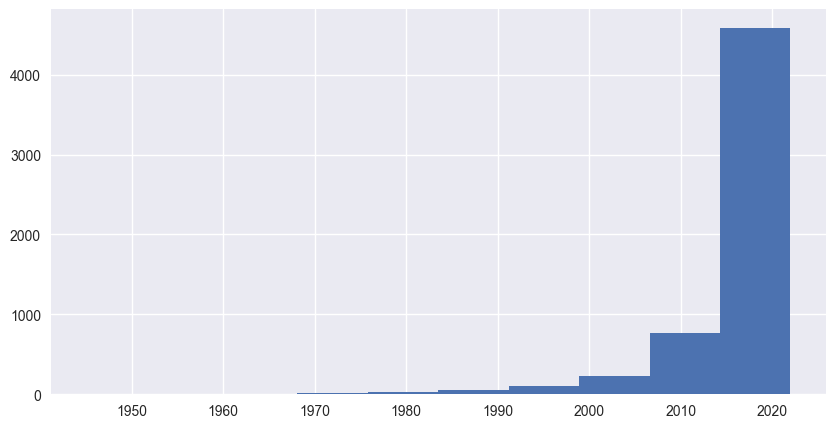

In [18]:
data_frame['release_year'].hist(figsize=(10, 5))

* TV-MA and R ratings had the highest production

<AxesSubplot: >

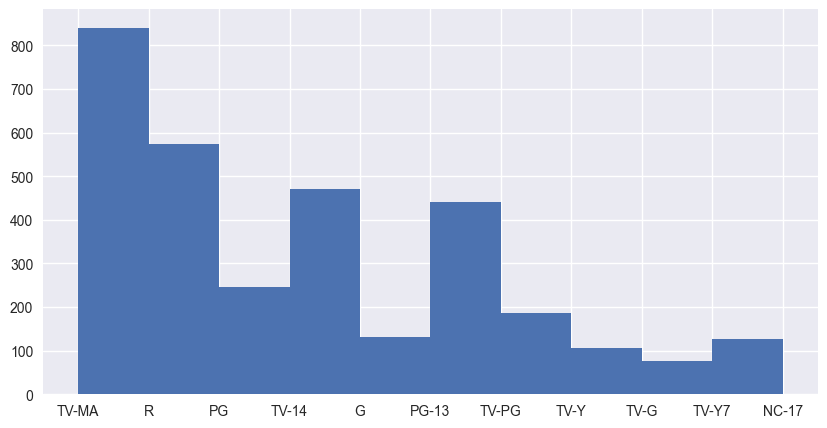

In [19]:
data_frame['age_certification'].hist(figsize=(10, 5))

In [20]:
grouped = data_frame.groupby(['release_year']).mean() # groupby works best with categorical columns
grouped 

/var/folders/g5/v3rvf25j7kb6bppjcjpx1jl80000gn/T/ipykernel_40649/3695769875.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = data_frame.groupby(['release_year']).mean()


,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,,,,,,
1945,48.000000,1.000000,NaN,NaN,0.600000,NaN
1953,105.000000,NaN,6.800000,231.000000,1.826000,5.800000
1954,107.500000,NaN,7.450000,21796.000000,5.788000,7.100000
1956,120.000000,NaN,6.700000,590.000000,1.044000,5.900000
1958,77.000000,NaN,7.500000,4385.000000,3.556000,7.400000
...,...,...,...,...,...,...
2018,73.918605,1.850498,6.530559,9339.311050,13.924341,6.752285
2019,74.737028,1.590909,6.526168,11701.365952,12.150977,6.955791
2020,71.915528,1.336601,6.344444,9950.611621,14.800493,6.977056


#### Objectives 
* repair the production countries and genre column 
* apply a strategy to drop column or row missing data 

In [21]:
data_frame.tail(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5786,tm851599,Tersanjung: The Movie,MOVIE,"After growing up in a tumultuous household, Yu...",2021,NaN,114,"['drama', 'romance']",['ID'],NaN,tt11668994,5.8,205.0,2.268,8.2
5787,tm1040832,Mommy Issues,MOVIE,"“Mommy Issues” revolves around Ella (Pokwang),...",2021,NaN,89,['comedy'],['PH'],NaN,tt14880428,5.4,38.0,2.043,1.0
5788,tm1025616,Loyiso Gola: Unlearning,MOVIE,South African comedian Loyiso Gola serves up f...,2021,NaN,60,['comedy'],[],NaN,tt14111708,5.9,202.0,1.672,7.5
5789,tm846586,Layla Majnun,MOVIE,"While in Azerbaijan, Layla, an Indonesian scho...",2021,NaN,119,"['drama', 'romance']",['ID'],NaN,tt11313944,6.1,272.0,3.646,7.5
5790,tm1106888,Meeting Point,MOVIE,"She is 24, has completed a postgraduate course...",2021,NaN,90,['drama'],['TR'],NaN,tt15484242,4.2,423.0,2.065,2.0
5791,tm996479,Tuesdays And Fridays,MOVIE,Two millennials get into a relationship where ...,2021,NaN,106,"['romance', 'comedy']","['IN', 'GB']",NaN,tt9176102,4.5,758.0,1.658,5.3
5792,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,"['comedy', 'drama', 'romance']",['EG'],NaN,tt14216488,4.9,281.0,2.923,5.3
5793,ts296698,Glimpses of a Future,SHOW,A few weeks into the first COVID-19 lockdown i...,2021,TV-PG,4,[],[],1.0,tt14754320,NaN,NaN,0.600,NaN
5794,ts297061,Masameer County,SHOW,"A humorous view of a changing Saudi Arabia, as...",2021,TV-MA,23,[],['SA'],1.0,NaN,NaN,NaN,0.959,8.0
5795,tm878575,The Heartbreak Club,MOVIE,"Coping with heartbreak, the shy owner of floun...",2021,NaN,101,"['comedy', 'drama', 'romance']",['ID'],NaN,tt11841144,6.2,188.0,2.227,8.0


In [27]:
import ast 
import random 

def repair_array_bound_data(arr):
    arr = ast.literal_eval(arr)

    if len(arr) == 0:
        return np.nan 

    elif len(arr) == 1:
        return arr[0]

    else:
        return random.choice(arr)

In [24]:
x = '[1, 2, 3]'

y = [1, 2, 3]

In [25]:
x[0]

'['

In [26]:
y[0]

1

In [28]:
data_frame['production_countries'] = data_frame['production_countries'].apply(repair_array_bound_data)
data_frame['genres'] = data_frame['genres'].apply(repair_array_bound_data)

In [29]:
data_frame.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,drama,US,NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,comedy,GB,NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,NaN,tt0070047,8.1,391942.0,95.337,7.7


In [30]:
columns_to_fill = ("imdb_score", "tmdb_score", "tmdb_popularity")

for col in columns_to_fill:
    data_frame[col].fillna(0.0, inplace=True)

In [36]:
data_frame.dropna(axis=0, subset=[
    "imdb_votes",
    "imdb_id",
    "age_certification", 
    "description",
    "genres",
    "seasons",
    "production_countries"
], inplace=True)

In [38]:
len(data_frame)

1620

In [39]:
data_frame.head(30)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,european,GB,4.0,tt0063929,8.8,72895.0,12.919,8.3
47,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,comedy,US,9.0,tt0098904,8.9,302700.0,128.743,8.3
55,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,drama,US,4.0,tt0083437,6.9,33760.0,44.378,7.5
57,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,drama,GB,24.0,tt0086815,6.5,4948.0,49.384,6.6
60,ts20678,Saved by the Bell,SHOW,Lovable schemer Zack Morris leads his pals on ...,1989,TV-G,23,family,US,5.0,tt0096694,7.1,34854.0,16.945,8.0
64,ts25028,Wheel of Fortune,SHOW,This game show sees contestants solve word puz...,1983,TV-G,26,family,US,39.0,tt0072584,6.7,3126.0,1440.855,6.7
65,ts23753,Major Dad,SHOW,Major Dad is an American sitcom created by Ric...,1989,TV-PG,24,comedy,US,4.0,tt0096643,6.4,2866.0,7.506,6.3
66,ts2760,Fireman Sam,SHOW,Follow the adventures of fireman Sam and his c...,1987,TV-Y,10,animation,GB,13.0,tt0329829,6.1,1759.0,25.697,7.3
67,ts987,Danger Mouse,SHOW,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,15,animation,GB,10.0,tt0081848,7.4,3514.0,7.748,7.4
98,ts63001,High Risk,SHOW,High Risk is a program aired by the CBS televi...,1988,TV-PG,50,comedy,US,1.0,tt0094478,3.8,6.0,0.600,0.0


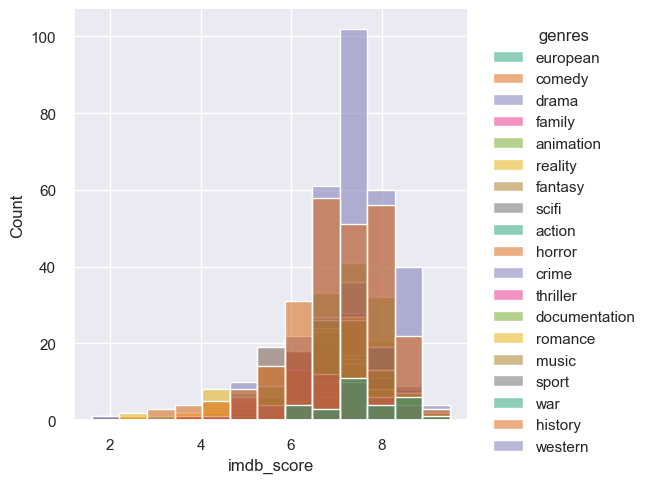

In [47]:
sns.set(style="darkgrid")
sns.displot(data=data_frame, x="imdb_score", hue="genres", bins=13, palette="Dark2")

<AxesSubplot: xlabel='production_countries', ylabel='count'>

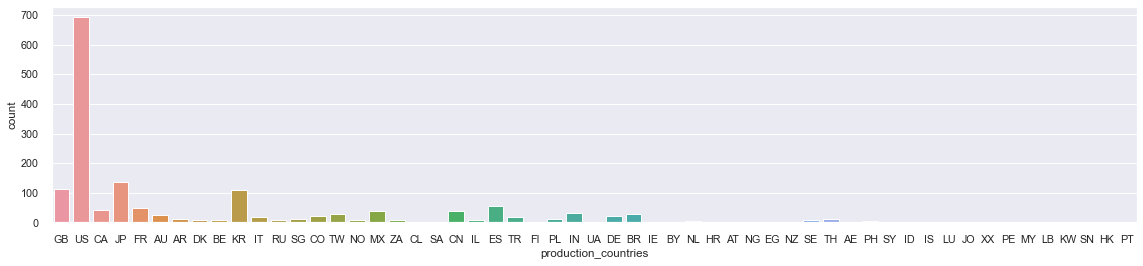

In [49]:
plt.figure(figsize=(20, 4), dpi=70)
sns.countplot(data=data_frame, x="production_countries") # finding out which category had the most rows for it in our data 

<AxesSubplot: xlabel='age_certification', ylabel='count'>

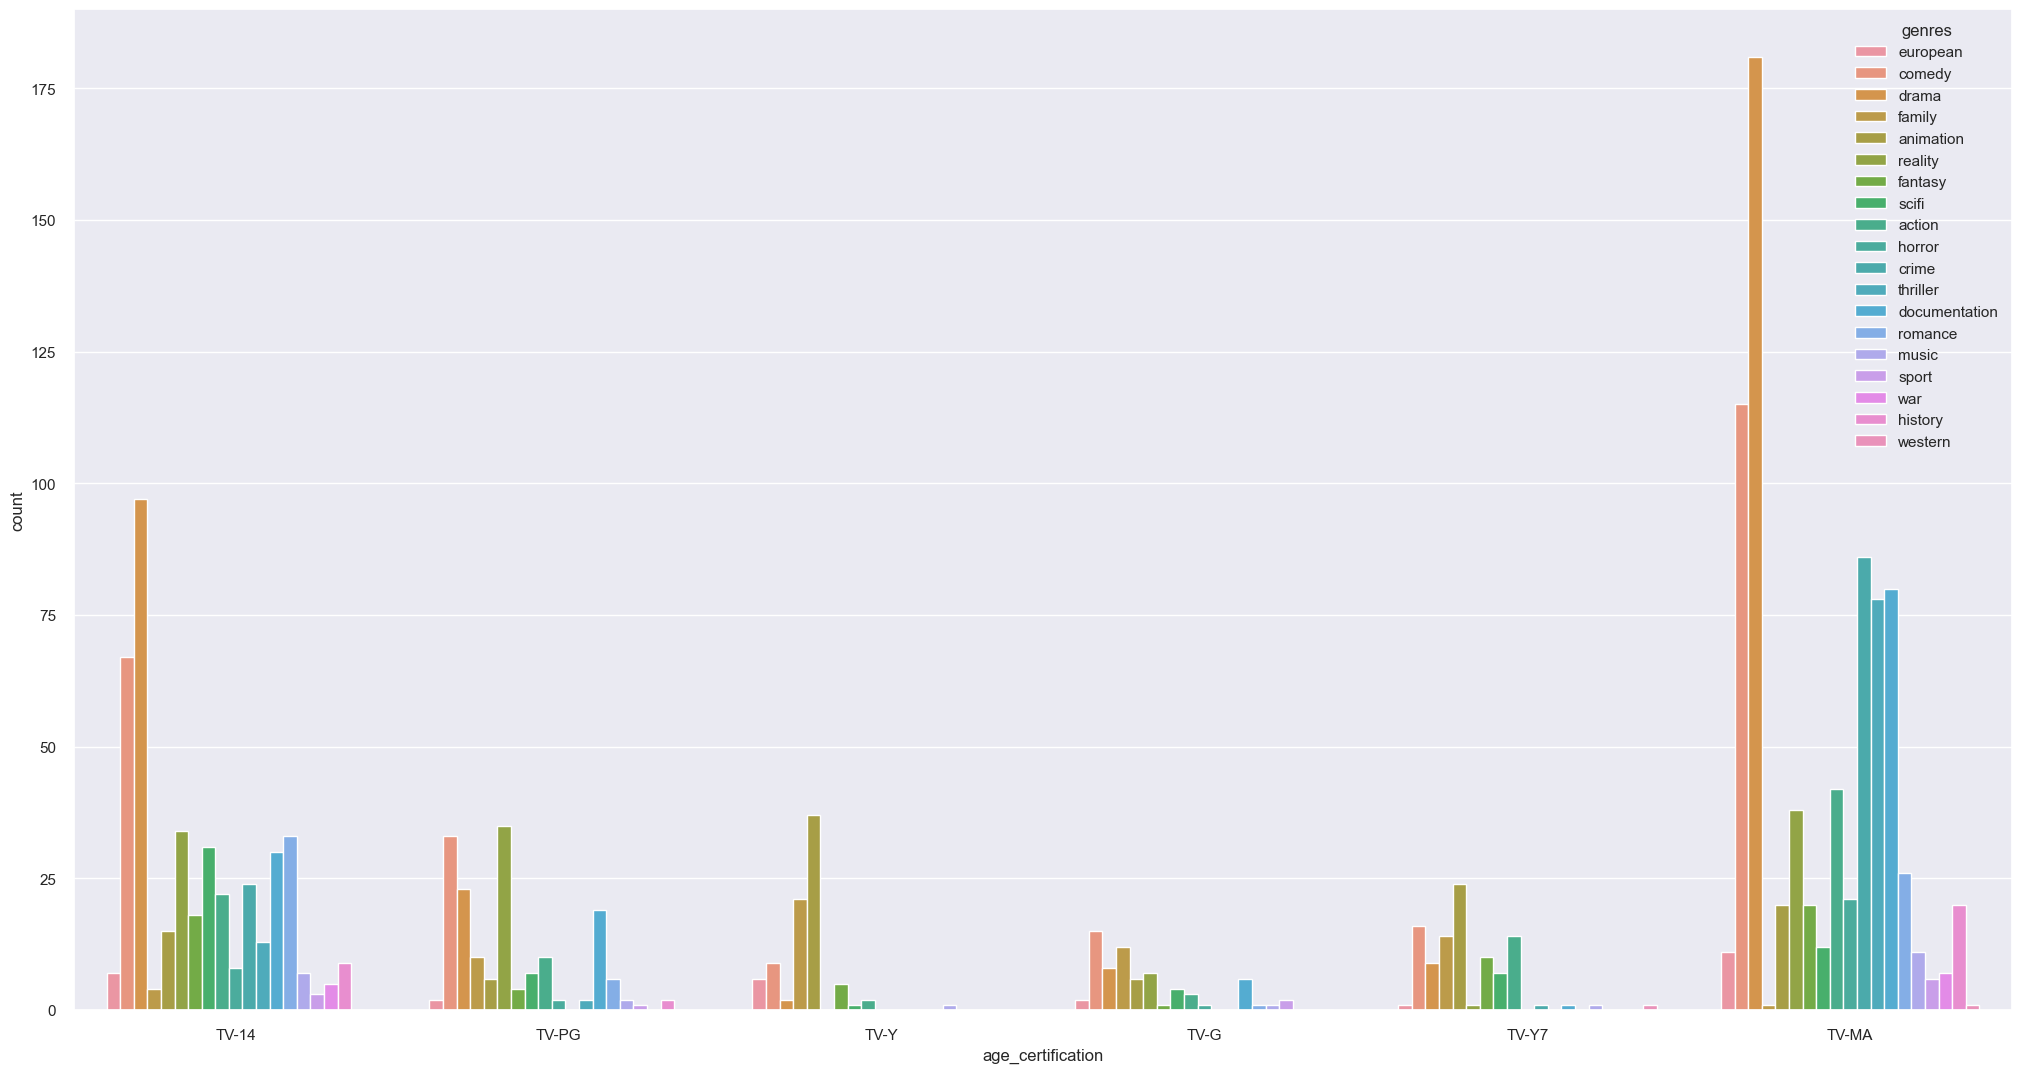

In [50]:
plt.figure(figsize=(25, 13))
sns.countplot(data=data_frame, x="age_certification", hue="genres")

In [51]:
x = '["a", "b", "c"]'

In [52]:
x[0]

'['

In [53]:
x = ["a", "b", "c"]
print(x[0])

a


### challenge 
1. make request to api and extract data into a dataframe 
2. once that is done analyze and cleanse the data 